In [146]:
import datetime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [147]:
#files and folders
data_dir="./../data/preprocessed/"
graph_dir="./../model_visualization/decision_tree/"
data_file = "negative_data_merge_weather_forest.csv"

In [148]:
#loading data
data = pd.read_csv(data_dir+data_file, encoding='utf-8')

In [149]:
data.shape

(1046, 18)

In [150]:
data.head(5)

,Unnamed: 0,UNITID,AGENCY,FIRENAME,ACRES,CAUSE,SHAPEAREA,SHAPELEN,start,end,max_temperature,min_temperature,avg_temperature,departure_temperature,hdd,cdd,percipitation,label
0,18,WASES,WA DNR - SE REGION,WHITES BASIN FIRE,122.677970,UNKNOWN,5.343831e+06,14408.752985,2000-07-17,2000-07-17 00:00:00,85.0,52.0,68.5,68.5,0.0,4.0,0.0,True
1,19,WAOWF,OKAN-WEN NF,BAILEY FIRE,3211.967525,UNKNOWN,1.399127e+08,85511.107289,2001-08-13,2001-08-13 00:00:00,95.0,62.0,78.5,78.5,0.0,14.0,0.0,True
2,20,WASES,WA DNR - SE REGION,DRY CREEK FIRE,17.146866,UNKNOWN,7.469145e+05,3467.790280,2001-08-01,2001-08-01 00:00:00,62.0,44.0,53.0,53.0,12.0,0.0,0.0,True
3,21,WANES,WA DNR - NE REGION,GAMBLES MILL FIRE (BREWSTER,5516.094728,UNKNOWN,2.402801e+08,79565.077700,2001-08-12,2001-08-12 00:00:00,91.0,60.0,75.5,75.5,0.0,11.0,0.0,True
4,22,WASES,WA DNR - SE REGION,HIGHLAND FLATS FIRE,128.725767,UNKNOWN,5.607272e+06,15603.206251,2001-08-01,2001-08-01 00:00:00,71.0,52.0,61.5,61.5,3.0,0.0,0.0,True


In [151]:
data.describe()

,Unnamed: 0,ACRES,SHAPEAREA,SHAPELEN,max_temperature,min_temperature,avg_temperature,departure_temperature,hdd,cdd,percipitation
count,1046.000000,1046.000000,1.046000e+03,1.046000e+03,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,329.560229,3911.964130,1.704045e+08,5.099237e+04,71.313251,51.428128,61.370689,32.153290,4.856629,1.672246,0.061878
std,188.956271,17019.064025,7.413475e+08,1.557769e+05,10.164667,5.988103,7.303963,32.171405,4.496930,2.930378,0.194652
min,18.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-7.800000,0.000000,0.000000,0.000000
25%,173.250000,0.000000,0.000000e+00,0.000000e+00,64.000000,48.000000,57.375000,0.400000,0.882222,0.000000,0.000000
50%,313.000000,0.151900,6.616733e+03,3.649428e+02,70.380952,52.000000,60.500000,12.250000,4.000000,0.000000,0.000000
75%,485.750000,907.797415,3.954350e+07,3.778582e+04,78.244318,55.000000,66.075000,65.000000,7.776786,2.194118,0.030000
max,678.000000,255899.595743,1.114694e+10,1.764409e+06,98.000000,66.200000,80.000000,80.000000,29.450000,15.000000,2.620000


In [152]:
data.groupby('label').size()

label
False    523
True     523
dtype: int64

In [153]:
# Plot relation between input and output variables
def io_trend(variable, output, data):
    """
    Identify positive or negative relation with the output label
    :param variable: input variable
    :param output: label
    :param data: wildfire data set
    :return: plot graph showing the relation
    """
    fig = plt.figure(figsize=(10,10))
#     plt.clf()
    sns.regplot(x=variable, y=output, data=data)
    plt.show()
    fig.savefig(graph_dir+variable+"_relation.png")
#     plt.savefig(graph_dir+variable+"_relation.png")

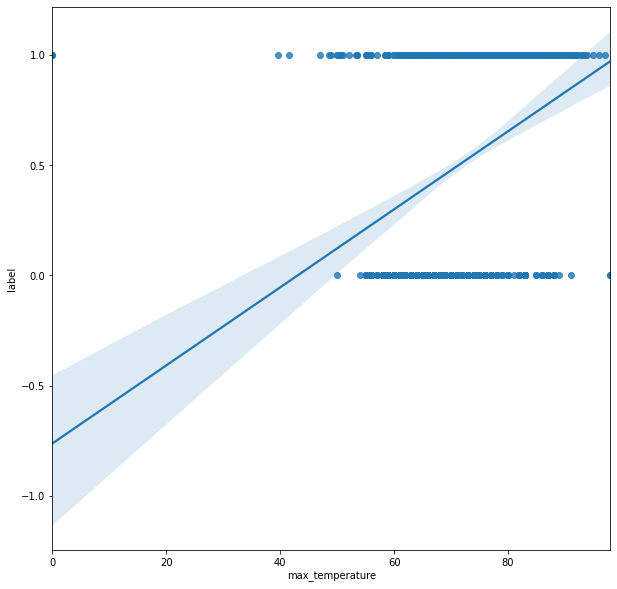

In [154]:
io_trend('max_temperature', 'label', data)

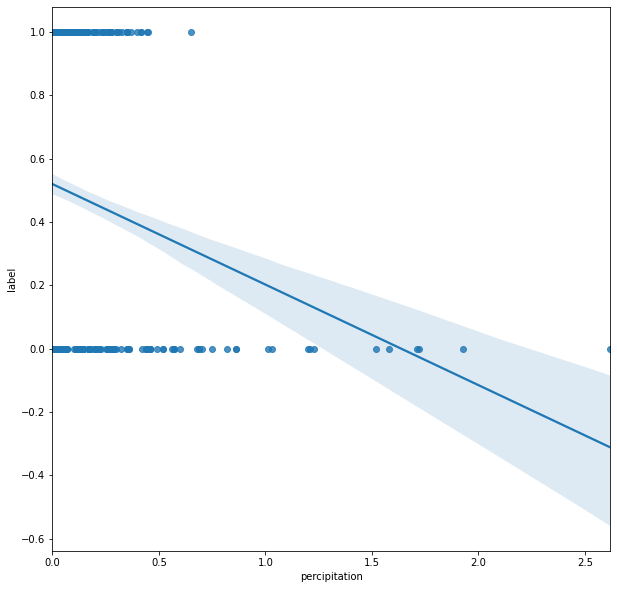

In [155]:
io_trend('percipitation', 'label', data)

In [156]:
def preprocess_input(X):
    """
    Remove uncessary column and convert date to ordinal data
    :param X: input data to preprocess
    :return: processed data
    """
    X.drop(columns=['end'], inplace=True)
    X.drop(columns=['ACRES'], inplace=True)
    X.drop(columns=['CAUSE'], inplace=True)
    X.drop(columns=['SHAPEAREA'], inplace=True)
    X.drop(columns=['SHAPELEN'], inplace=True)    
    
    X['start'] = pd.to_datetime(X['start'])
    X['start'] = X['start'].map(datetime.datetime.toordinal)
    X = pd.get_dummies(X)
    return X

In [157]:
data.shape

(1046, 18)

In [158]:
# # input data
print(list(data.columns) )
X = data.iloc[:, 4:-1]
print(list(X.columns) )
X.shape

['Unnamed: 0', 'UNITID', 'AGENCY', 'FIRENAME', 'ACRES', 'CAUSE', 'SHAPEAREA', 'SHAPELEN', 'start', 'end', 'max_temperature', 'min_temperature', 'avg_temperature', 'departure_temperature', 'hdd', 'cdd', 'percipitation', 'label']
['ACRES', 'CAUSE', 'SHAPEAREA', 'SHAPELEN', 'start', 'end', 'max_temperature', 'min_temperature', 'avg_temperature', 'departure_temperature', 'hdd', 'cdd', 'percipitation']


(1046, 13)

In [159]:
X = preprocess_input(X)
print(list(X.columns) )
X.shape

['start', 'max_temperature', 'min_temperature', 'avg_temperature', 'departure_temperature', 'hdd', 'cdd', 'percipitation']


(1046, 8)

In [168]:
X.head(5)

,start,max_temperature,min_temperature,avg_temperature,departure_temperature,hdd,cdd,percipitation
0,730318,85.0,52.0,68.5,68.5,0.0,4.0,0.0
1,730710,95.0,62.0,78.5,78.5,0.0,14.0,0.0
2,730698,62.0,44.0,53.0,53.0,12.0,0.0,0.0
3,730709,91.0,60.0,75.5,75.5,0.0,11.0,0.0
4,730698,71.0,52.0,61.5,61.5,3.0,0.0,0.0


In [160]:
# output data
y = data.iloc[:, -1]
y.shape

(1046,)

In [161]:
def make_confusion_matrix(cf, categories,
                          group_names=None,
                          count=True,
                          percent=True,
                          color_bar=True,
                          xy_ticks=True,
                          xy_plot_labels=True,
                          sum_stats=True,
                          fig_size=None,
                          c_map='Blues',
                          title=None):
    """
    Code to generate text within each box and beautify confusion matrix.
    :param cf: Confusion matrix
    :param categories: array of classes
    :param group_names: classes in the project
    :param count: whether to display the count of each class
    :param percent: whether to display percentage for each class
    :param color_bar: whether to display color bar for the heat map
    :param xy_ticks: whether to display xy labels
    :param xy_plot_labels: whether to display xy title
    :param sum_stats: whether to display overall accuracy
    :param fig_size: size of the plot
    :param c_map: color scheme to use
    :param title: Title of the plot
    :return: Confusion matrix
    """
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names) == cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        row_size = np.size(cf, 0)
        col_size = np.size(cf, 1)
        group_percentages = []
        for i in range(row_size):
            for j in range(col_size):
                group_percentages.append(cf[i][j] / cf[i].sum())
        group_percentages = ["{0:.2%}".format(value)
                             for value in group_percentages]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip()
                  for v1, v2, v3 in zip(group_labels,
                                        group_counts,
                                        group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy = np.trace(cf) / float(np.sum(cf))
        stats_text = "\n\nAccuracy={0:0.2%}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if fig_size is None:
        # Get default figure size if not set
        fig_size = plt.rcParams.get('figure.figsize')

    if not xy_ticks:
        # Do not show categories if xyticks is False
        categories = False

    # MAKE THE HEAT MAP VISUALIZATION
    plt.figure(figsize=fig_size)
    sns.heatmap(cf, annot=box_labels, fmt="",
                cmap=c_map, cbar=color_bar,
                xticklabels=categories,
                yticklabels=categories)

    if xy_plot_labels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

In [162]:
# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
#Data Classification using Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
# Evaluate predictions
print(accuracy_score(y_test, prediction))

1.0


In [164]:
print(confusion_matrix(y_test, prediction))

[[102   0]
 [  0 108]]


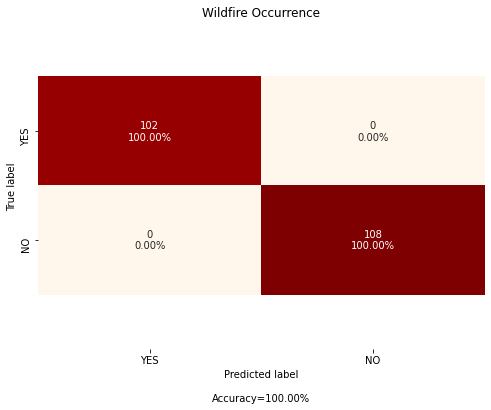

In [165]:
corr = confusion_matrix(y_test, prediction)
# plot confusion matrix
make_confusion_matrix(corr,
                          categories=['YES', 'NO'],
                          count=True,
                          percent=True,
                          color_bar=False,
                          xy_ticks=True,
                          xy_plot_labels=True,
                          sum_stats=True,
                          fig_size=(8, 6),
                          c_map='OrRd',
                          title='Wildfire Occurrence')
# error correction - cropped heat map
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values
plt.savefig(graph_dir+"confusion_matrix.png", bbox_inches='tight')

In [166]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       102
        True       1.00      1.00      1.00       108

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



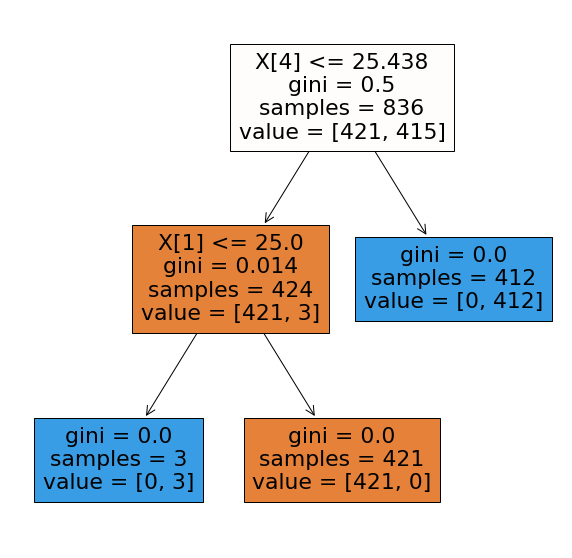

In [167]:
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(model, filled=True)
fig.savefig(graph_dir+"decistion_tree.png")    